In [1]:
%matplotlib inline

import tensorflow as tf

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping # Added EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

import numpy as np
from numpy.random import seed, randint

# Getting the data

This digit is 8


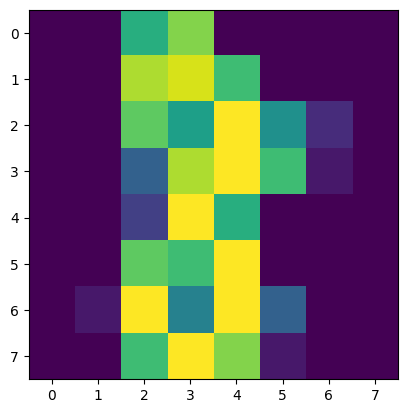

In [2]:
digits = load_digits()

a = randint(low = 0, high = 1796)
plt.imshow(digits.images[a])
print("This digit is {}".format(digits.target[a]))

# Training the neural network

In [3]:
num_classes = 10
X = digits.data
y = digits.target
Y = to_categorical(y, num_classes)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y)
input_size = X[0].shape[0]

In [8]:
seed(0)
tf.random.set_seed(0)

model = Sequential() # initialize a neural network
model.add(Dense(units = 32, activation='tanh', input_dim=input_size)) # add a hidden layer
model.add(Dense(units = num_classes, activation='softmax')) #add the output layer

sgd = SGD(learning_rate = 0.1)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

history = model.fit(X_train, Y_train, epochs = 10, batch_size = 50, verbose = 0, validation_split = 0.2)

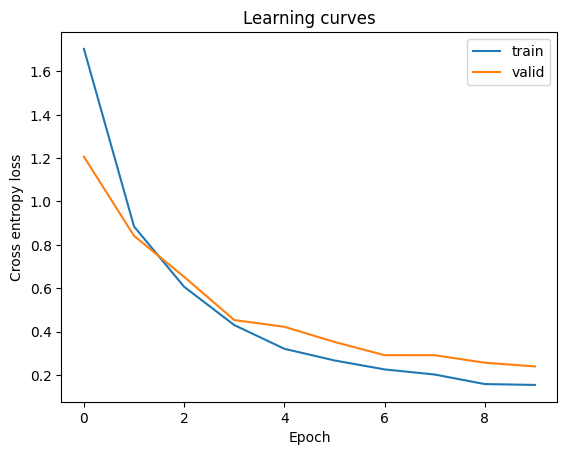

In [9]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

In [10]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, Y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

43/43 [==============================] - 0s 846us/step - loss: 0.1429 - accuracy: 0.9792
Loss + accuracy on train data: [0.14294159412384033, 0.9792130589485168]
15/15 [==============================] - 0s 788us/step - loss: 0.2435 - accuracy: 0.9378
Loss + accuracy on test data: [0.2435312718153, 0.9377777576446533]


# Consider misclassified digits

In [17]:
probabilities = np.array(model.predict(X_test))
predictions = np.argmax(probabilities, axis = 1) #what does the model predict
labels = np.argmax(Y_test, axis = 1) #what are the actual labels

print("Predictions = {}".format(predictions[0:30]))
print("Labels      = {}".format(labels[0:30]))

15/15 [==============================] - 0s 642us/step
Predictions = [1 2 7 8 7 6 9 7 2 9 6 3 0 9 4 0 7 6 1 6 5 3 5 0 5 3 7 2 3 4]
Labels      = [1 2 7 8 7 6 9 7 2 9 6 3 0 9 4 0 7 6 1 6 5 3 5 0 5 3 7 2 3 4]


This digit is 8, but classified as 9.


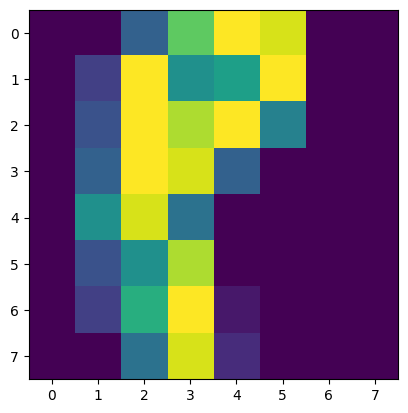

In [18]:
misclas_idxs = np.argwhere(predictions != labels)

b = randint(low = 0, high = len(misclas_idxs) - 1) #choose a random index
a = misclas_idxs[b][0] # find out what image that index is
plt.imshow(np.reshape(X_test[a], (8,8)))
print("This digit is {}, but classified as {}.".format(labels[a], predictions[a]))

There are several ways we could potentially optimize the algorithm for better performance (e.g., higher accuracy on the test set):

 - Data Preprocessing:
    - Scaling: Scale input values to [0, 1] or [-1, 1].
 - Network Architecture:
    - Activation Function: Change tanh to relu.
    - Network Depth/Width: Add layers or increase units per layer.
- Optimizer:
    - Algorithm: Switch from SGD to Adam.
    - Learning Rate: Tune the learning rate.
 - Regularization (to prevent overfitting):
    - Dropout: Add Dropout layers.
    - L1/L2 Regularization: Add kernel regularizers.
 - Training Process:
    - Epochs: Increase the number of training epochs.
    - Early Stopping: Implement EarlyStopping callback.
    - Batch Size: Experiment with different batch sizes.

Recommendation:

A good starting point would be to:

 - Scale the input data X to [0, 1].
 - Change the hidden layer activation to relu.
 - Switch the optimizer to Adam (using its default learning rate initially).
 - Increase the number of epochs significantly (e.g., 100) and add EarlyStopping based on val_loss.

# Optimized Model

In [19]:
# Reload and scale data for the optimized model
digits_opt = load_digits()
X_opt = digits_opt.data / 16.0 # Scale data to [0, 1]
y_opt = digits_opt.target
Y_opt = to_categorical(y_opt, num_classes)
X_train_opt, X_test_opt, Y_train_opt, Y_test_opt = train_test_split(X_opt, Y_opt, stratify = y_opt) # Use scaled X_opt and Y_opt
input_size_opt = X_opt[0].shape[0]

In [20]:
# Define the optimized model
seed(1) # Use a different seed for comparison if desired
tf.random.set_seed(1)

model_opt = Sequential() # Initialize a new neural network
model_opt.add(Dense(units = 32, activation='relu', input_dim=input_size_opt)) # Use relu activation
model_opt.add(Dense(units = num_classes, activation='softmax')) # Output layer

adam_opt = Adam() # Use Adam optimizer
model_opt.compile(loss = 'categorical_crossentropy', optimizer = adam_opt, metrics = ['accuracy'])

model_opt.summary() # Display model architecture

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 2410 (9.41 KB)
Trainable params: 2410 (9.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Define EarlyStopping callback
early_stopping_opt = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the optimized model
history_opt = model_opt.fit(X_train_opt, Y_train_opt, 
                            epochs = 100, # Increased epochs
                            batch_size = 50, 
                            verbose = 0, 
                            validation_split = 0.2, 
                            callbacks=[early_stopping_opt]) # Added callback

print(f"Training finished after {len(history_opt.history['loss'])} epochs.")

Training finished after 100 epochs.


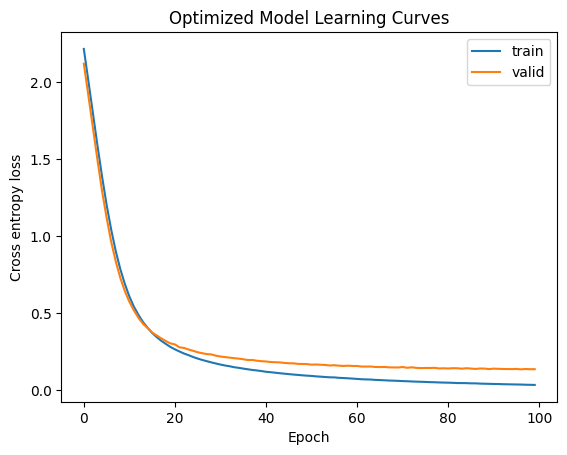

In [22]:
# Plot learning curves for the optimized model
plt.figure()
plt.title("Optimized Model Learning Curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history_opt.history['loss'], label = 'train')
plt.plot(history_opt.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

In [23]:
# Evaluate the optimized model
print("Optimized Model - Loss + accuracy on train data: {}".format(model_opt.evaluate(X_train_opt, Y_train_opt, verbose=0)))
print("Optimized Model - Loss + accuracy on test data: {}".format(model_opt.evaluate(X_test_opt, Y_test_opt, verbose=0)))

Optimized Model - Loss + accuracy on train data: [0.05477264150977135, 0.9888641238212585]
Optimized Model - Loss + accuracy on test data: [0.11805345118045807, 0.9711111187934875]


In [ ]:
# Consider misclassified digits for the optimized model
probabilities_opt = np.array(model_opt.predict(X_test_opt))
predictions_opt = np.argmax(probabilities_opt, axis = 1)
labels_opt = np.argmax(Y_test_opt, axis = 1)

print("Optimized Predictions = {}".format(predictions_opt[0:30]))
print("Optimized Labels      = {}".format(labels_opt[0:30]))

misclas_idxs_opt = np.argwhere(predictions_opt != labels_opt)

if len(misclas_idxs_opt) > 0:
    b_opt = randint(low = 0, high = len(misclas_idxs_opt) - 1) #choose a random index
    a_opt = misclas_idxs_opt[b_opt][0] # find out what image that index is
    plt.figure()
    plt.imshow(np.reshape(X_test_opt[a_opt], (8,8)))
    plt.title("Optimized Model Misclassification")
    print("This digit is {}, but classified as {}.".format(labels_opt[a_opt], predictions_opt[a_opt]))
else:
    print("No misclassifications found on the test set for the optimized model!")